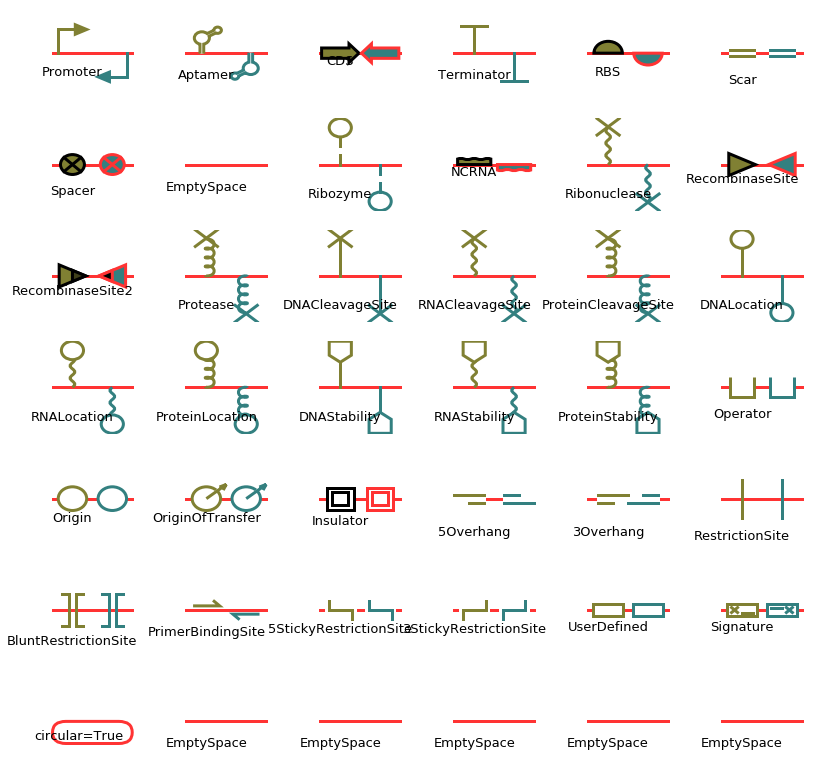

In [1]:
#import sys
import dnaplotlib as dpl
import matplotlib.pyplot as plt
#import matplotlib.transforms as mtransforms
#import matplotlib.patches as mpatch
#from matplotlib.patches import FancyBboxPatch
import numpy as np
from bokeh.models import (Plot , Range1d)
#bokeh.io.output_notebook()

%matplotlib inline
dnaline = 3
edgecolor = (1,.2,.2)

dr = dpl.DNARenderer(scale = 5,linewidth=dnaline,linecolor=edgecolor)
part_renderers = dr.SBOL_part_renderers()
parts = list(part_renderers.keys())+[['EmptySpace','circular test']]+['EmptySpace']*5
dontrender = ['StemTop']
fig1 = plt.figure(figsize=(14,14))
faxes = fig1.subplots(ncols=6,nrows=7)
raxes = np.ravel(faxes)
#print(raxes)
raxind = 0

for part in parts:
    if(part in dontrender):
        continue
    if(type(part)==list):
        circMake = True
        part = part[0]
        partlabel = "circular=True"
    else:
        circMake = False
        partlabel=part
    ax = raxes[raxind]
    raxind+=1
    #plt.Figure(figsize=(.1,.1))
    #ax = plt.gca()
    design = [{'type':part, 'name':'test', 'fwd':True,\
               'opts':{'label':partlabel,'label_size':13,'label_y_offset':-8,'color':(.5,.5,.2)}},
             {'type':part, 'name':'testr', 'fwd':False,'opts':{'color':(.2,.5,.5),'edgecolor':edgecolor}}]
    start,end = dr.renderDNA(ax,design,part_renderers,circular=circMake)
    ax.axis('off')
    xdist = end-start
    delta = xdist*.2
    start-=delta
    end+=delta
    newxdist = end-start
    ax.set_xlim([start,end])
    ax.set_ylim([-newxdist/len(design),newxdist/len(design)])
plt.show()

In [48]:
from bokeh.io import curdoc, show
import bokeh.io
from bokeh.models import ColumnDataSource, Grid, LinearAxis, MultiPolygons, Plot, GlyphRenderer, HoverTool
bokeh.io.output_notebook()
xs_dict = [
    [ {'exterior': [1, 1, 2, 2],  'holes': [                              ]} ],
    [ {'exterior': [1, 1, 3],     'holes': [ [1.5, 1.5, 2]                ]} ],
    [ {'exterior': [2, 2, 4, 4],  'holes': [ [2.5, 2.5, 3], [3.5, 3, 3]   ]},
      {'exterior': [3.5, 3.5, 4], 'holes': [                              ]} ]
]

ys_dict = [
    [ {'exterior': [4, 3, 3, 4],  'holes': [                              ]} ],
    [ {'exterior': [1, 3, 1],     'holes': [ [1.5, 2, 1.5]                ]} ],
    [ {'exterior': [2, 4, 4, 2],  'holes': [ [3, 3.5, 3.5], [2.5, 2.5, 3] ]},
      {'exterior': [1, 1.5, 1.5], 'holes': [                              ]} ]
]
ys_dict2 = [
    [ {'exterior': [4, 3, 3, 4],  'holes': [                              ]} ],
    [ {'exterior': [1, 3, 1],     'holes': [ [1.5, 2, 1.5]                ]} ],
    [ {'exterior': [2, 9, 4, 2],  'holes': [ [3, 3.5, 3.5], [2.5, 2.5, 3] ]},
      {'exterior': [1, 1.5, 1.5], 'holes': [                              ]} ]
]
xs = [[[p['exterior'], *p['holes']] for p in mp] for mp in xs_dict]
ys = [[[p['exterior'], *p['holes']] for p in mp] for mp in ys_dict]
print(dict(xs=xs, ys=ys))
source = ColumnDataSource(dict(xs=xs, ys=ys,name=["ooga","booga","dooga"]))

plot = Plot(
    title=None, plot_width=300, plot_height=300,
    min_border=0, toolbar_location=None)

glyph = MultiPolygons(xs="xs", ys="ys", line_width=2,fill_color="grey")
selglyph = MultiPolygons(xs="xs", ys="ys", line_width=2,fill_color="blue")
g1 = plot.add_glyph(source, glyph)
g1.hover_glyph = selglyph

hover1 = HoverTool(tooltips=[("name","@name")],renderers=[g1])

plot.add_tools(hover1)
#help(plot)
xaxis = LinearAxis()
#plot.add_layout(xaxis, 'below')

yaxis = LinearAxis()
#plot.add_layout(yaxis, 'left')

#plot.add_layout(Grid(dimension=0, ticker=xaxis.ticker))
#plot.add_layout(Grid(dimension=1, ticker=yaxis.ticker))

show(plot)

Loading BokehJS ...

{'xs': [[[[1, 1, 2, 2]]], [[[1, 1, 3], [1.5, 1.5, 2]]], [[[2, 2, 4, 4], [2.5, 2.5, 3], [3.5, 3, 3]], [[3.5, 3.5, 4]]]], 'ys': [[[[4, 3, 3, 4]]], [[[1, 3, 1], [1.5, 2, 1.5]]], [[[2, 4, 4, 2], [3, 3.5, 3.5], [2.5, 2.5, 3]], [[1, 1.5, 1.5]]]]}
